<a href="https://colab.research.google.com/github/mydevco/python-desktop-reference/blob/main/NEC_Project_AI_ML_GovindMekala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project

This project aims to develop a predictive model for assessing the risk of diabetes in patients based on various health metrics. Diabetes is a significant global health issue, and early prediction can lead to better management and prevention strategies. The proposed approach leverages machine learning algorithms to analyze patient data and predict diabetes risk, contributing to the field of preventive healthcare.
Diabetes dataset (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database )
The primary task is to classify individuals as at-risk or not at-risk for diabetes using input features such as age, BMI, blood pressure, and glucose levels.

Experimental Evaluation
Methodology: Evaluation will be based on accuracy, precision, recall, and F1-score. The dataset will be split into training (80%) and testing (20%) sets.
Results: Quantitative results will be presented through confusion matrices and ROC curves to visualize model performance.

Reference:
Zhang, Y. (2015). A Comparative Study of Diabetes Prediction Based on Lifestyle Factors Using Machine Learning. Arxiv.org. https://arxiv.org/html/2503.04137v1

The following source is available under MIT License.

Copyright 2025 Govind Mekala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


1. **Pregnancies**: Number of times pregnant

2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skin fold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"

# Load the latest version
diabetes_data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("\n\nFirst 5 records:", diabetes_data.head())


/tmp/ipython-input-2242080797.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  diabetes_data = kagglehub.load_dataset(


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


##Explorative Data Analysis and Preprocessing

##Visualize features

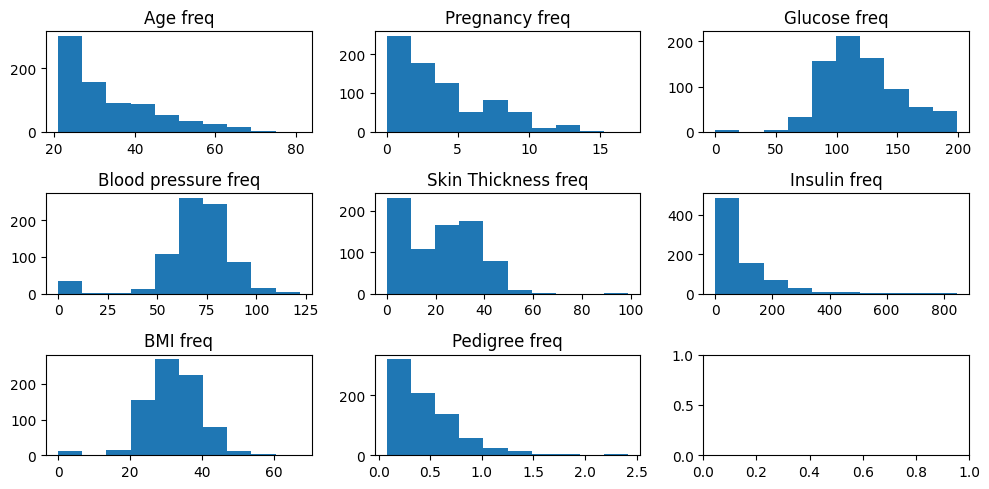

In [ ]:
%matplotlib inline


import matplotlib.pyplot as plt

# plot histograms to reveal how the data is skewed

fig, axes = plt.subplots( nrows=3, ncols=3 )
( ageHist, pregHist, glucoseHist, bldPressHist, skinThickHist
 , insulHist, bmiHist, pedigrHist, placeholder ) = axes.flatten()

fig.set_size_inches( 10, 5 )

ageHist.hist( diabetes_data[ "Age" ] )
ageHist.set_title( 'Age freq' )

pregHist.hist( diabetes_data[ "Pregnancies" ] )
pregHist.set_title( 'Pregnancy freq' )

glucoseHist.hist( diabetes_data[ "Glucose" ] )
glucoseHist.set_title( 'Glucose freq' )

bldPressHist.hist( diabetes_data[ "BloodPressure" ] )
bldPressHist.set_title( 'Blood pressure freq' )

skinThickHist.hist( diabetes_data[ "SkinThickness" ] )
skinThickHist.set_title( 'Skin Thickness freq' )

insulHist.hist( diabetes_data[ "Insulin" ] )
insulHist.set_title( 'Insulin freq' )

bmiHist.hist( diabetes_data[ "BMI" ] )
bmiHist.set_title( 'BMI freq' )

pedigrHist.hist( diabetes_data[ "DiabetesPedigreeFunction" ] )
pedigrHist.set_title( 'Pedigree freq' )

plt.subplots_adjust(left=0.5,  bottom=0.5, right=1.5, top=1.5, wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
diabetes_data.corr() #Correlation Matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
!pip install graphviz
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24636 sha256=2ad7d26d2d2157b67cd14f527669105737e0cae9b66e9a2755a2829cdffa4d83
  Stored in directory: /root/.cache/pip/wheels/77/54/7c/c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [ ]:
#Common Package import
# ndarray processing using NumPy
import numpy as np

# Dataframe processing using Panda
import pandas as pd

# for randomly selecting train/test data from dataframe
import random

# "pretty-print" arbitrary data structure(dict object of a tree in our case) in clearer form
from pprint import pprint

import io

# this is needed because misc.imread is deprecated
import imageio

# below needs this to run on terminal:  brew install graphviz
from sklearn.tree import export_graphviz

# weird! this needs to run both: conda install graphviz AND pip install graphviz
import graphviz

import pydotplus as pydot

import matplotlib.pyplot as plt

import seaborn as sns

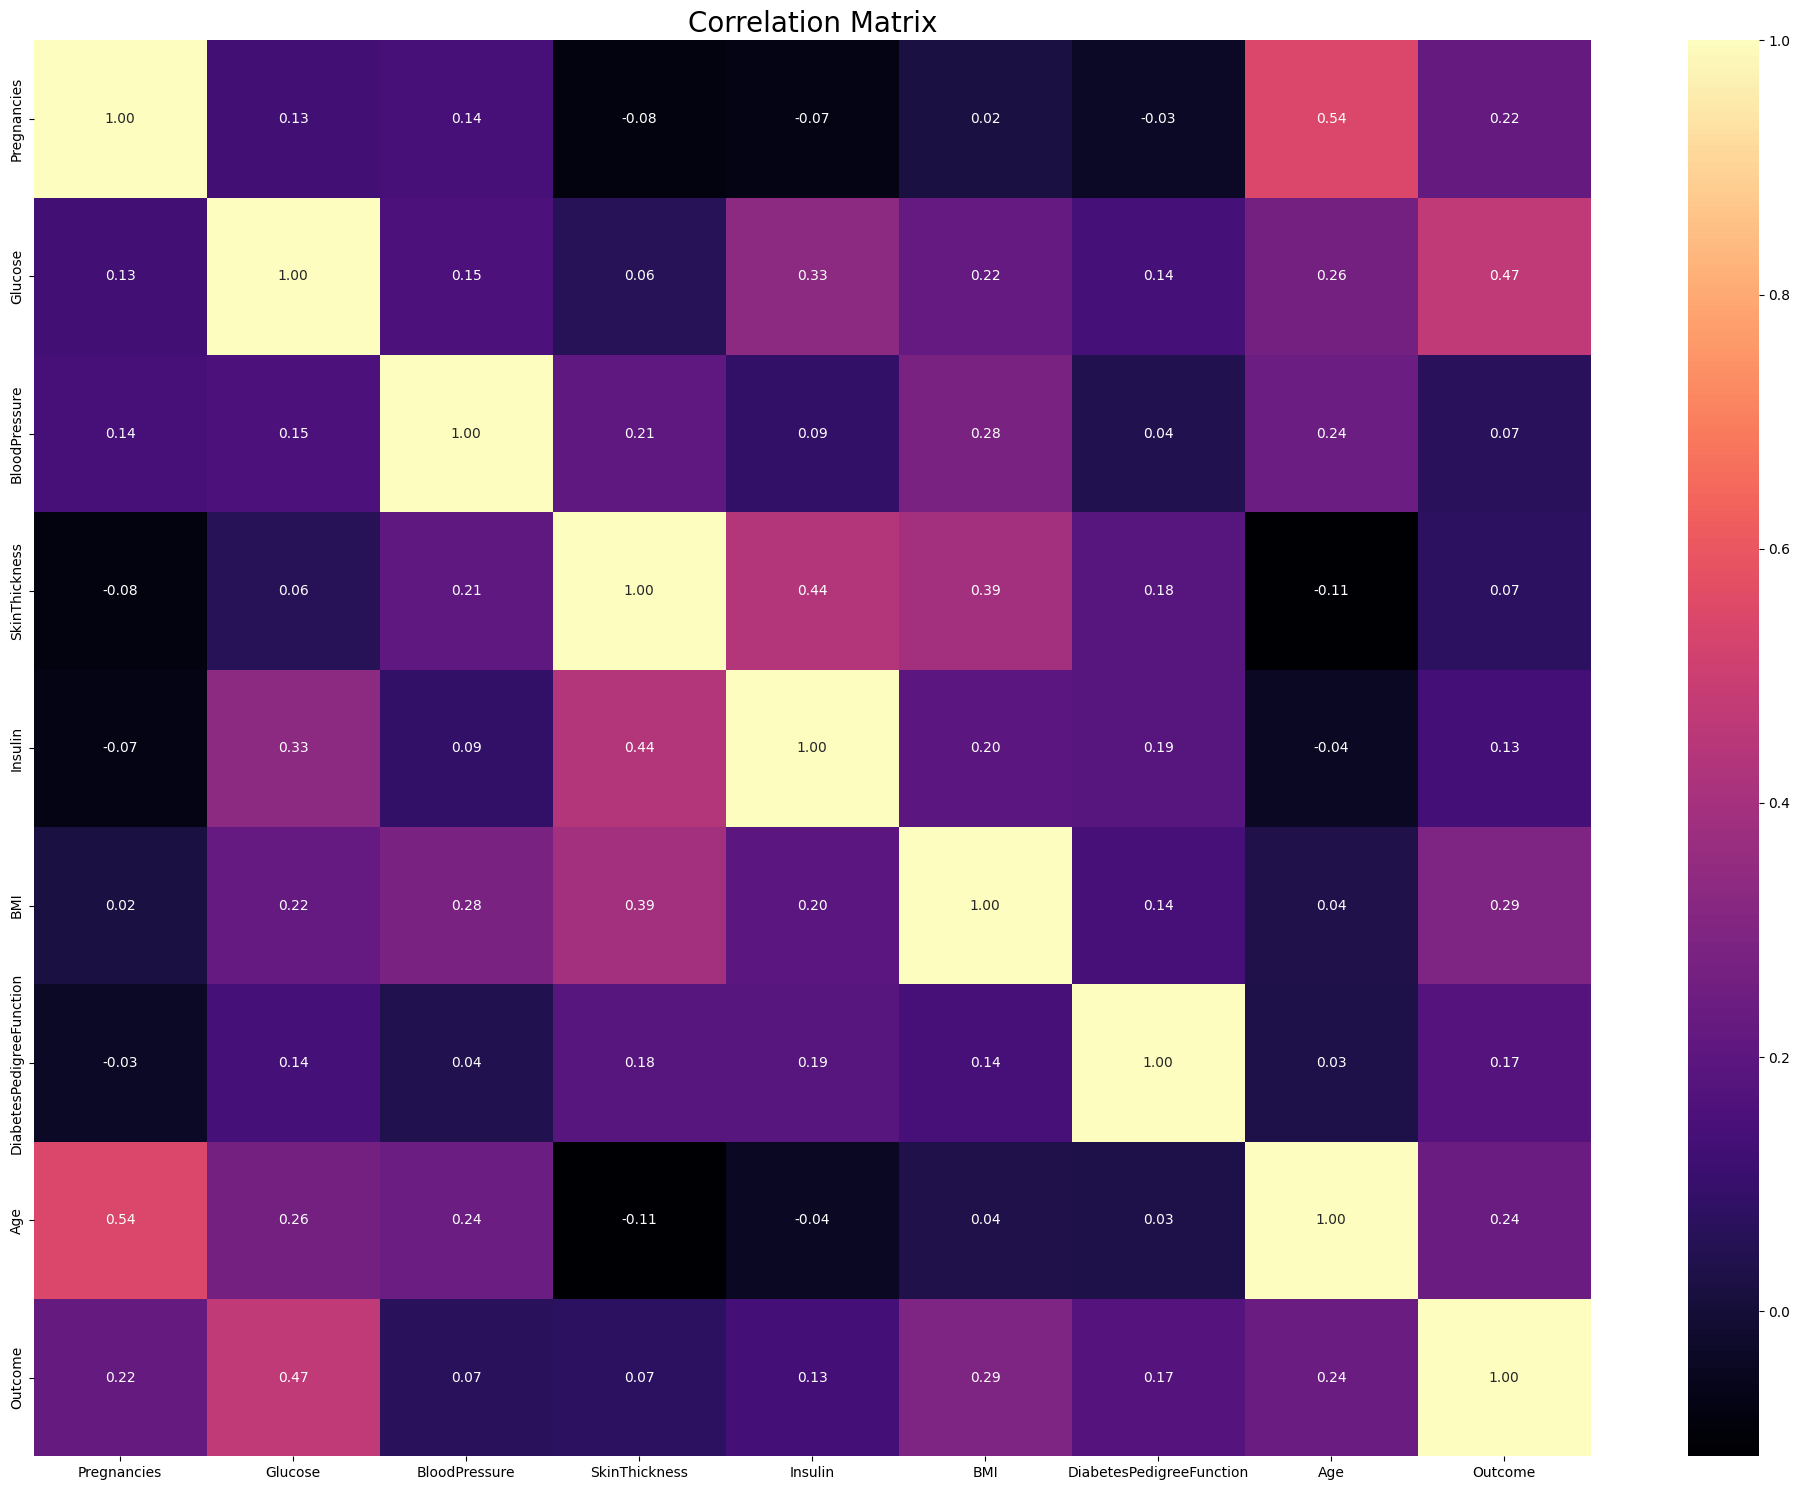

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diabetes_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.tight_layout()
plt.show()

## Data cleaning and preprocessing


In [ ]:
# use log to flatten Age out a bit
import numpy as np
diabetes_data = diabetes_data.assign( log_Age = lambda x:
                                 np.log( x[ 'Age' ] ) )

# apply zscore for other features:  glucose, blood pressure
# skin thickness, insulin, BMI
from scipy.stats import zscore

diabetes_data = diabetes_data.assign( zscore_glucose = zscore( diabetes_data[ 'Glucose' ] ) )
diabetes_data = diabetes_data.assign( zscore_pressure = zscore( diabetes_data[ 'BloodPressure' ] ) )
diabetes_data = diabetes_data.assign( zscore_thick = zscore( diabetes_data[ 'SkinThickness' ] ) )
diabetes_data = diabetes_data.assign( zscore_insulin = zscore( diabetes_data[ 'Insulin' ] ) )
diabetes_data = diabetes_data.assign( zscore_bmi = zscore( diabetes_data[ 'BMI' ] ) )

# apply min-max for other features:  pregnancy, diabetes pedigree
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

minMaxData = pd.DataFrame( scaler.fit_transform( diabetes_data.loc[ :, [ 'Pregnancies','DiabetesPedigreeFunction' ] ] )
                         , columns = [ 'minMaxPreg', 'minMaxPedigree' ] )
diabetes_data = pd.concat( [ diabetes_data, minMaxData ], axis = 1, join = 'inner' )

diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_Age,zscore_glucose,zscore_pressure,zscore_thick,zscore_insulin,zscore_bmi,minMaxPreg,minMaxPedigree
0,6,148,72,35,0,33.6,0.627,50,1,3.912023,0.848324,0.149641,0.907270,-0.692891,0.204013,0.352941,0.234415
1,1,85,66,29,0,26.6,0.351,31,0,3.433987,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,0.058824,0.116567
2,8,183,64,0,0,23.3,0.672,32,1,3.465736,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.470588,0.253629
3,1,89,66,23,94,28.1,0.167,21,0,3.044522,-0.998208,-0.160546,0.154533,0.123302,-0.494043,0.058824,0.038002
4,0,137,40,35,168,43.1,2.288,33,1,3.496508,0.504055,-1.504687,0.907270,0.765836,1.409746,0.000000,0.943638


In [ ]:
# remove unneeded features
diabetes_copy = diabetes_data.copy(deep=True)
del diabetes_copy[ 'Age' ]
del diabetes_copy[ 'Glucose' ]
del diabetes_copy[ 'BloodPressure' ]
del diabetes_copy[ 'SkinThickness' ]
del diabetes_copy[ 'Insulin' ]
del diabetes_copy[ 'BMI' ]
del diabetes_copy[ 'DiabetesPedigreeFunction' ]
del diabetes_copy[ 'Pregnancies' ]

diabetes_copy.head()

,Outcome,log_Age,zscore_glucose,zscore_pressure,zscore_thick,zscore_insulin,zscore_bmi,minMaxPreg,minMaxPedigree
0,1,3.912023,0.848324,0.149641,0.907270,-0.692891,0.204013,0.352941,0.234415
1,0,3.433987,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,0.058824,0.116567
2,1,3.465736,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.470588,0.253629
3,0,3.044522,-0.998208,-0.160546,0.154533,0.123302,-0.494043,0.058824,0.038002
4,1,3.496508,0.504055,-1.504687,0.907270,0.765836,1.409746,0.000000,0.943638


In [ ]:
# split data into 80% training 20% testing
from sklearn.model_selection import train_test_split
train, test = train_test_split( diabetes_copy, test_size = 0.2 )

In [ ]:
# select features to train and test
features = [ "log_Age", "zscore_glucose", "zscore_pressure", "zscore_thick"
            , "zscore_insulin", "zscore_bmi", "minMaxPreg", "minMaxPedigree" ]
X_train = train[ features ]
Y_train = train[ "Outcome" ]
X_test = test[ features ]
Y_test = test[ "Outcome" ]

##Model Selection

We will use three classification models — Decision Tree, K-Nearest Neighbors (KNN), and Logistic Regression.
We will implemented, train and evaluated to determine their predictive performance.

## 1. Decision Tree Classification

In [ ]:
# train a Boosted Decision tree model to predict Diabetic Outcome (0 or 1)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# this will create 200 weak learner decision trees and use them to build a strong classifier
bdt = AdaBoostClassifier( DecisionTreeClassifier( max_depth = 4 )
                         , n_estimators=200 )
dt = bdt.fit( X_train, Y_train )

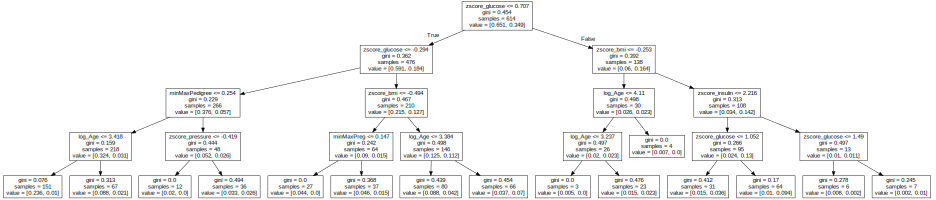

In [ ]:
from sklearn import tree
import graphviz
%matplotlib inline

def show_tree( theTree, features, width, height ):
    the_data = tree.export_graphviz( theTree, out_file = None,
                             feature_names = features )

    # find first { in string
    indexDot = the_data.find( '{' )
    # hack to resize graph because kaggle doesn't have a way to change size on graphviz dot string
    the_data = the_data[ : indexDot + 1 ] + '\n graph [size="%d,%d"]; ' % (width, height) + the_data[ indexDot + 1 : ]

    graph = graphviz.Source( the_data )
    return graph

# modified function to handle ensemble instead of a single decision tree
def show_tree2( theTree, index, features, path ):
    f = io.StringIO()
    export_graphviz( theTree[ index ], out_file=f, feature_names=features )
    pydotplus.graph_from_dot_data( f.getvalue() ).write_png( path )
    #img = misc.imread( path )
    img = imageio.imread( path )
    plt.rcParams[ "figure.figsize" ] = ( 20, 20 )
    plt.imshow( img )
show_tree( dt[ 0 ], features, 13, 13 )

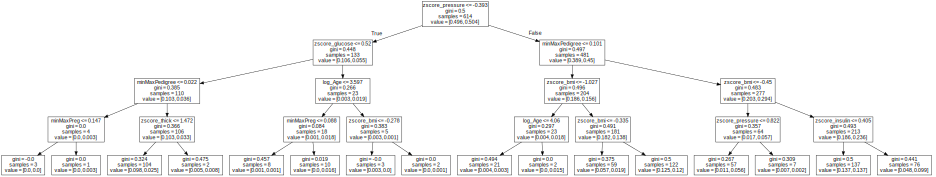

In [ ]:
show_tree( dt[ 199 ], features, 13, 13 )

##Feature importance based on observation

In [ ]:
for name, importance in zip( X_train.columns, dt.feature_importances_ ):
    print( name, importance )

log_Age 0.13906340594532887
zscore_glucose 0.15609217270140224
zscore_pressure 0.10515999108861747
zscore_thick 0.057855562689371726
zscore_insulin 0.061768911006624086
zscore_bmi 0.1740058960729606
minMaxPreg 0.07327984148095602
minMaxPedigree 0.2327742190147388


In [ ]:
# adapted from Kaggle examples
def plot_feature_importances( decTree, trainingFeatures ):
    featureList = trainingFeatures.columns.values

    # sort both arrays by importance but get only the sorted feature names
    featureList = [ x for _, x in sorted( zip( decTree.feature_importances_, featureList ) ) ]

    featureSize = len( featureList )
    plt.barh( range( featureSize ), sorted( decTree.feature_importances_ ) )
    plt.ylabel( "Feature" )
    plt.yticks( np.arange( featureSize ), featureList )
    plt.xlabel( "Importance" )


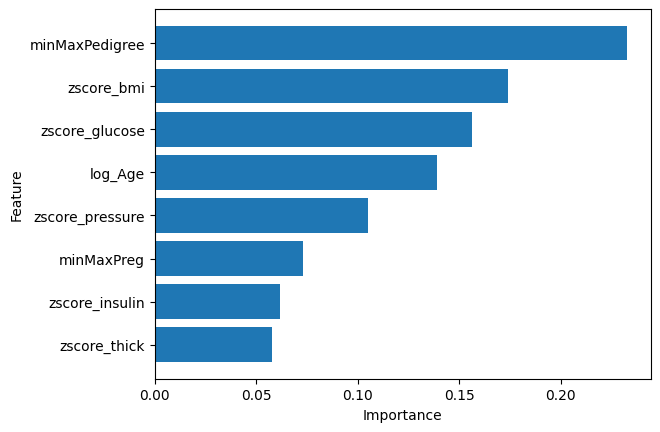

In [ ]:
plot_feature_importances( dt, X_train )

##Predict Diabetic Outcome

In [ ]:
Y_pred = dt.predict( X_test )
Y_probas = dt.predict_proba( X_test )

##Compute accuracy and precision score

Accuracy: 0.714 
Precision: 0.578 
Recall: 0.685 
F1 Score: 0.627 




True positives: 37  False negatives: 17
False positives: 27  True negatives: 73
AUC: 0.806


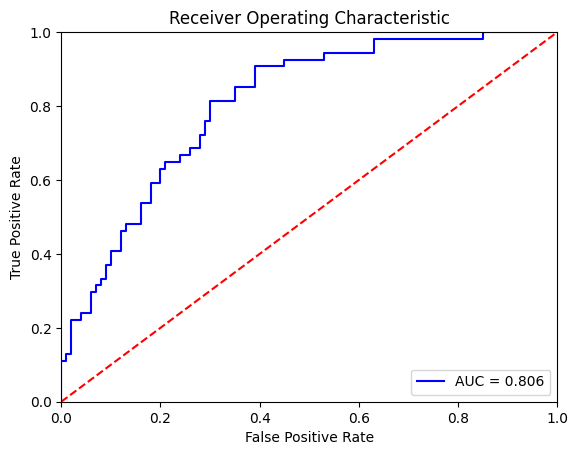

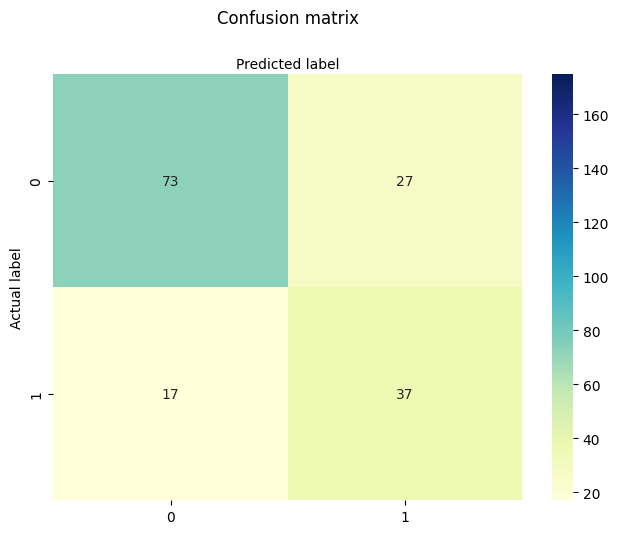

In [ ]:
from sklearn import metrics

# score the model on the test data
def scoreModel( Y_test, Y_pred ):
    # show accuracy, precision and recall
    from sklearn.metrics import accuracy_score
    score = accuracy_score( Y_test, Y_pred )
    print( "Accuracy: %.3f " % round( score, 3 ) )

    from sklearn.metrics import precision_score
    precScore = precision_score( Y_test, Y_pred, average = 'binary' )
    print( "Precision: %.3f " % round( precScore, 3 ) )

    from sklearn.metrics import recall_score
    recScore = recall_score( Y_test, Y_pred, average = 'binary' )
    print( "Recall: %.3f " % round( recScore, 3 ) )

    from sklearn.metrics import f1_score
    f1Score = f1_score(Y_test, Y_pred, average = 'binary')
    print( "F1 Score: %.3f " % round( f1Score, 3 ) )
    print('\n\n\n')

    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix( Y_test, Y_pred )
    print( "True positives: %d  False negatives: %d" % ( cm[ 1, 1 ], cm[ 1, 0 ] ) )
    print( "False positives: %d  True negatives: %d" % ( cm[ 0, 1 ], cm[ 0, 0 ] ) )

    fpr, tpr, thresholds = metrics.roc_curve( Y_test.values, Y_probas[:,1] )
    # AUC (area under the curve)
    auc = metrics.roc_auc_score(Y_test.values, Y_probas[:, 1])
    print( "AUC: %.3f" % auc )

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print('\n\n\n')
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    ax = sns.heatmap(
        pd.DataFrame(cm), # confusion matrix 2D array
        annot=True, # show numbers in the cells
        fmt='g', # show numbers as integers
        cmap='YlGnBu', # customize color map
        vmax=175 # to get better color contrast
    )



    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.show()
scoreModel( Y_test, Y_pred )

##2. Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes.


Source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, Y_train)

#Predict the outcome
Y_pred = logreg.predict(X_test)
Y_probas = logreg.predict_proba( X_test )

In [ ]:
# import the metrics class
from sklearn import metrics
#Create confusion matrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix


array([[86, 14],
       [21, 33]])

Accuracy: 0.773 
Precision: 0.702 
Recall: 0.611 
F1 Score: 0.653 




True positives: 33  False negatives: 21
False positives: 14  True negatives: 86
AUC: 0.831


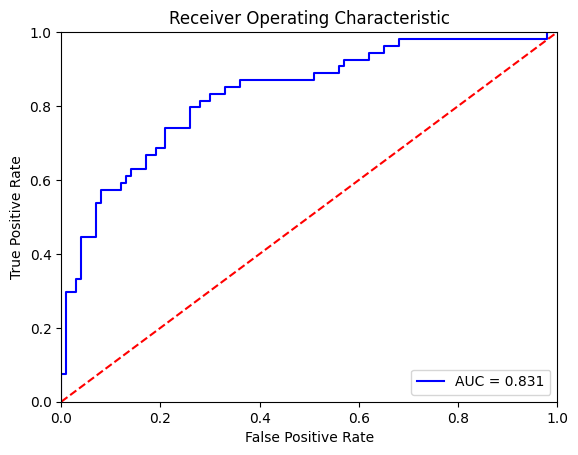

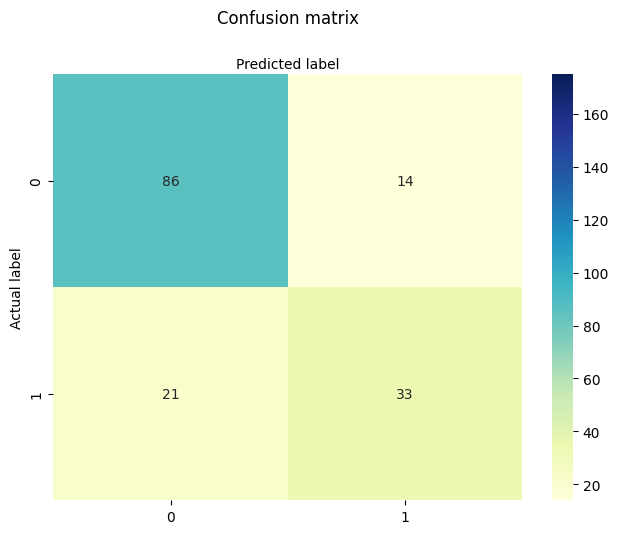

In [ ]:
scoreModel( Y_test, Y_pred )

## 3. SVM Classifier
we will define the support vector machine model for classification using the radial function (RBF) as the kernel function.

A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.

In [ ]:
# Defining the SVM classification model
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0, probability=True)

##Train the SVM Classifier

In [ ]:
# Training the SVM classifier
SVM_classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True, random_state=0)

## Make Prediction using SVM

In [ ]:
# Making predictions with the test data
Y_pred = SVM_classifier.predict(X_test)
Y_probas = SVM_classifier.predict_proba(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[85, 15],
       [21, 33]])

Accuracy: 0.766 
Precision: 0.688 
Recall: 0.611 
F1 Score: 0.647 




True positives: 33  False negatives: 21
False positives: 15  True negatives: 85
AUC: 0.834


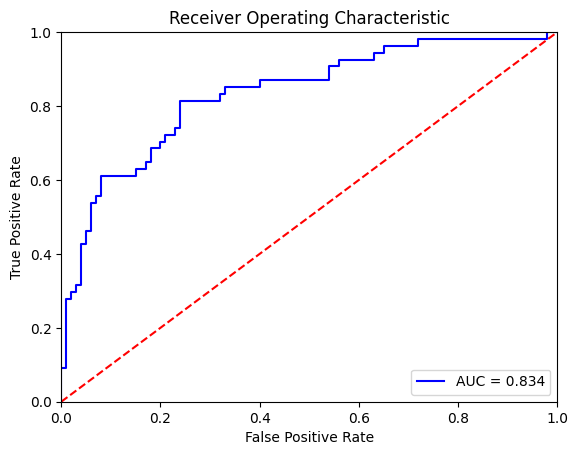

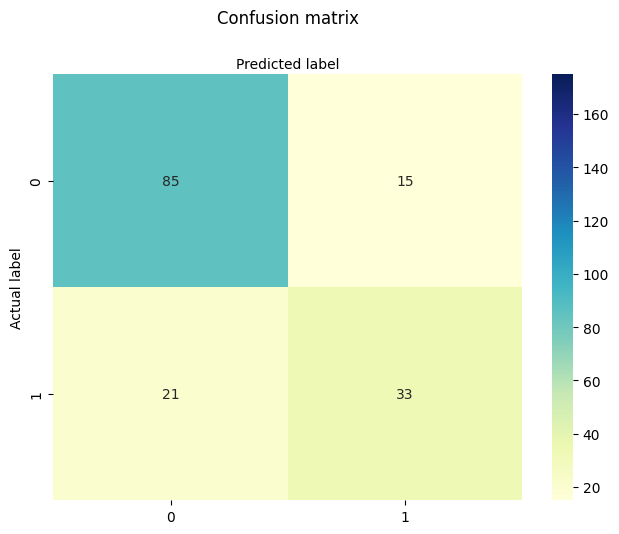

In [ ]:
scoreModel( Y_test, Y_pred )

## 4. Multi-layer perceptron classifier (MLP)

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset with dimension of input and output.

We will be using MLP package from sklearn.

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. MLPClassifier supports the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.

source: https://scikit-learn.org/stable/modules/neural_networks_supervised.html


In [ ]:

#Import MPLClassifier from sklearn
from sklearn.neural_network import MLPClassifier

#Create an instance of MLP classifier
MLP_Classifier = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100, ), activation='relu',
                              batch_size='auto', random_state=1, max_iter=1000)


##Train the MLP model

In [ ]:
# Training the MLP classifier
MLP_Classifier.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, max_iter=1000, random_state=1)

##Predict the outcome


In [ ]:
Y_pred = MLP_Classifier.predict(X_test)
Y_probas = MLP_Classifier.predict_proba( X_test )

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[75, 25],
       [18, 36]])

Accuracy: 0.721 
Precision: 0.590 
Recall: 0.667 
F1 Score: 0.626 




True positives: 36  False negatives: 18
False positives: 25  True negatives: 75
AUC: 0.832


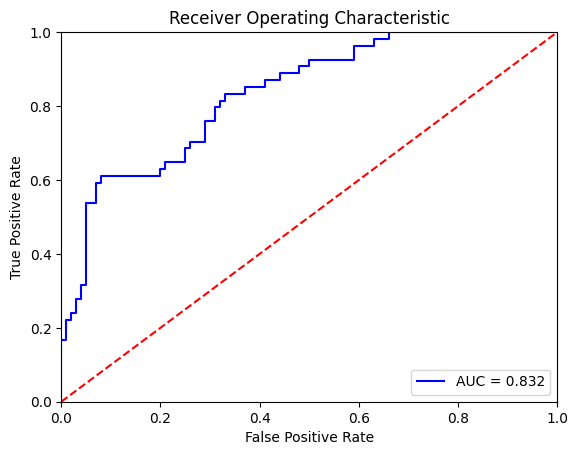

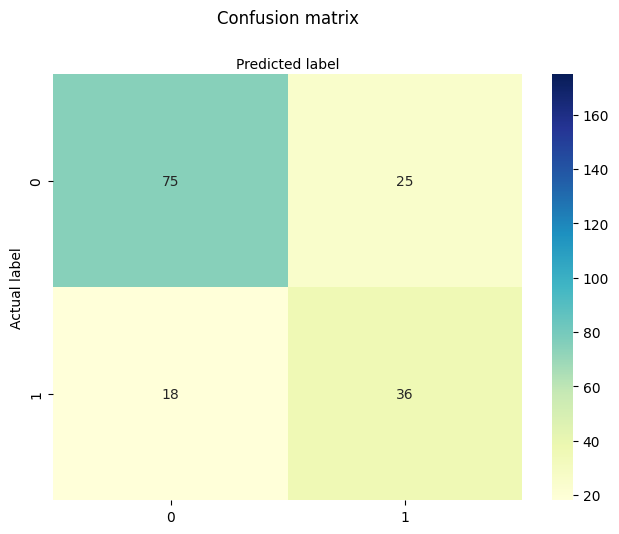

In [ ]:
scoreModel( Y_test, Y_pred )

##5. GradientBoostClassifier using XGBoost parameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#Create GradientBoostingClassifier instance
xgb = GradientBoostingClassifier(random_state = 12345)

#Using smaller parameters to be able run in colab in reasonable time
xgb_params = {
    "learning_rate": [0.05, 0.1],
    "min_samples_split": [0.1, 0.3],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "n_estimators": [1000]
}



##Create instance of GridSearch CV

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 20, n_jobs = -1, verbose = 3)

##Train the model

In [ ]:
# Training the GridSearchCV classifier
xgb_cv_model.fit(X_train, Y_train)

Fitting 20 folds for each of 16 candidates, totalling 320 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(random_state=12345),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [0.1, 0.3],
                         'n_estimators': [1000], 'subsample': [0.8, 1.0]},
             verbose=3)

In [ ]:
xgb_cv_model.best_params_ # print optimal parameters

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 0.3,
 'n_estimators': 1000,
 'subsample': 1.0}

##Build Tuned GradientBoostClassifier

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_)

##Train the tuned model

In [ ]:
# Training the tuned GradientBoosting classifier
xgb_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                           min_samples_split=0.3, n_estimators=1000)

##Predict the outcome

In [ ]:
Y_pred = xgb_tuned.predict(X_test)
Y_probas = xgb_tuned.predict_proba( X_test )

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[79, 21],
       [15, 39]])

Accuracy: 0.766 
Precision: 0.650 
Recall: 0.722 
F1 Score: 0.684 




True positives: 39  False negatives: 15
False positives: 21  True negatives: 79
AUC: 0.850


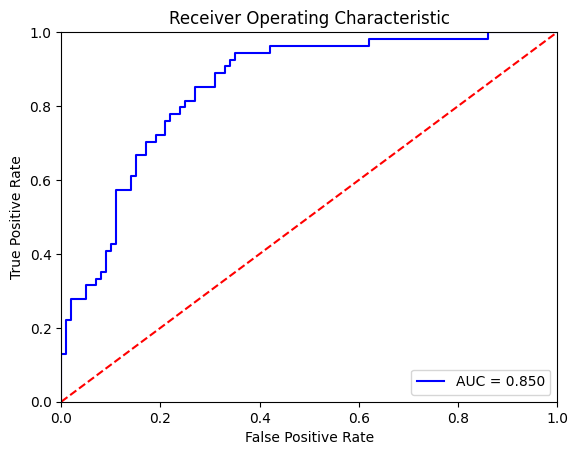

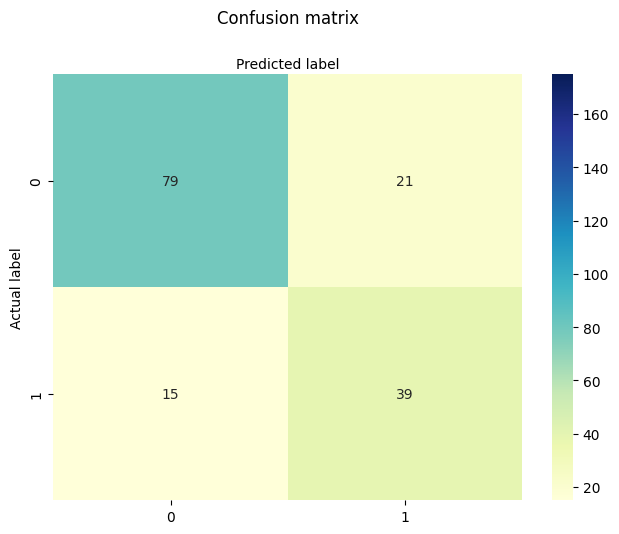

In [ ]:
scoreModel( Y_test, Y_pred )